In [1]:
from project import display, classification
from project.classification import ImageClassification
import os
import numpy as np

### Import and analyze the Data

In [2]:
#Data path
path ="C:/Users/kinga/Desktop/zadanie/RoadSignsPascalVOC/"
path_images = path + os.listdir(path)[1] 
path_annotations = path +  os.listdir(path)[0]
class_names=["limit_sign","no_limit_sign"]

ic = ImageClassification(path_images = path_images , path_annotations=path_annotations, class_names=class_names, img_size=280)

train_ds, test_ds = ic.prepare_dataset()


In [3]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (280, 280, 3)
Label:  0


In [4]:
train_ds, test_ds = ic.optimize_datasets(train_ds, test_ds)

In [5]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (32, 280, 280, 3)
Label:  [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]


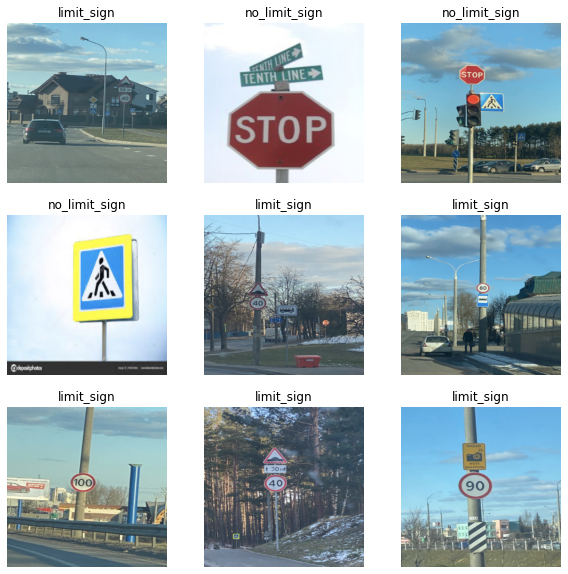

In [6]:
display.show_dataset(train_ds,class_names)

### Add augmentation

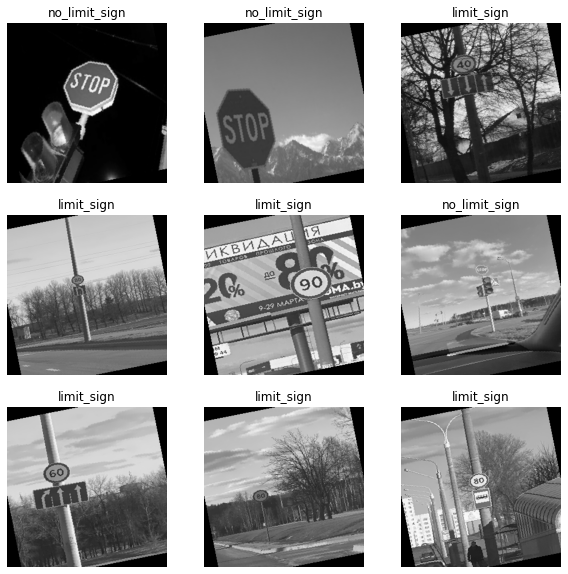

In [7]:
train_ds, test_ds = ic.prepare_dataset()
train_ds, test_ds = ic.optimize_datasets(train_ds, test_ds, True)
display.show_dataset(train_ds,class_names)


### Model CNN

Testowałam dane również na SGD oraz Random Forest Classifier, ale CNN daje najlepsze rezultaty

In [8]:
model = ic.create_base_model()

In [9]:
history = ic.model_compile(model, train_ds, test_ds)
history

Epoch 1/10
22/22 [==============================] - 31s 1s/step - loss: 79.8174 - accuracy: 0.6165 - val_loss: 0.7259 - val_accuracy: 0.8035
Epoch 2/10
22/22 [==============================] - 30s 1s/step - loss: 0.6369 - accuracy: 0.7898 - val_loss: 0.4452 - val_accuracy: 0.8439
Epoch 3/10
22/22 [==============================] - 31s 1s/step - loss: 0.4747 - accuracy: 0.8168 - val_loss: 0.4672 - val_accuracy: 0.8382
Epoch 4/10
22/22 [==============================] - 30s 1s/step - loss: 0.3458 - accuracy: 0.8651 - val_loss: 0.4574 - val_accuracy: 0.9017
Epoch 5/10
22/22 [==============================] - 30s 1s/step - loss: 0.2023 - accuracy: 0.9446 - val_loss: 0.3303 - val_accuracy: 0.8844
Epoch 6/10
22/22 [==============================] - 30s 1s/step - loss: 0.1143 - accuracy: 0.9602 - val_loss: 0.2823 - val_accuracy: 0.9595
Epoch 7/10
22/22 [==============================] - 31s 1s/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.2997 - val_accuracy: 0.9653
Epoch 8/10
22/22 [=

In [10]:
display.model_loss_acc(model, test_ds)

6/6 - 3s - loss: 0.4501 - accuracy: 0.9538


(0.4501087963581085, 0.9537572264671326)

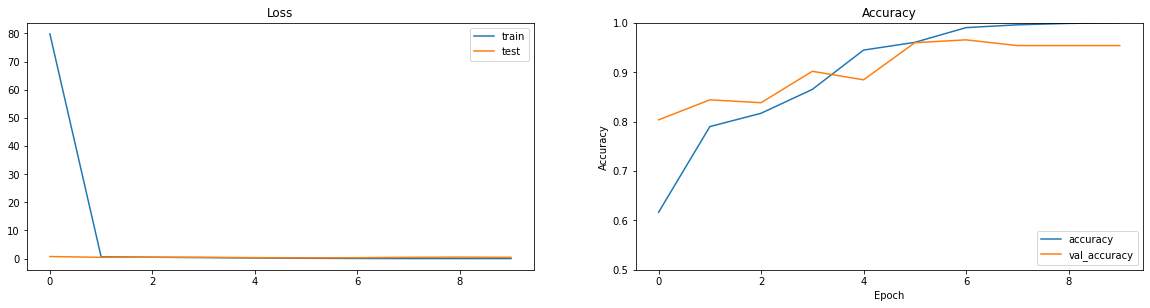

In [11]:
display.model_results(history)

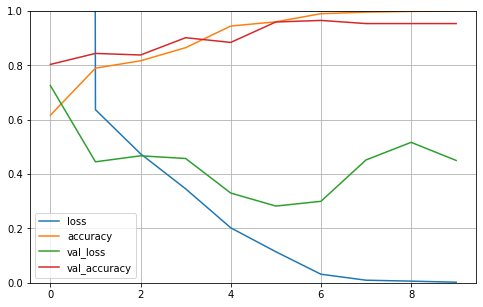

In [12]:
display.model_results_2(history)

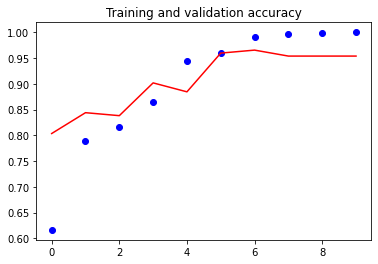

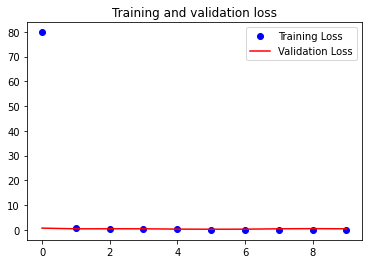

In [13]:
display.model_results_3(history)

Found 32 correct labels
Found 0 incorrect labels


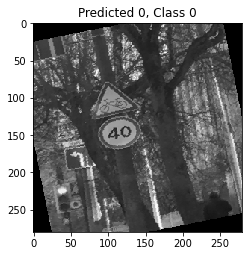

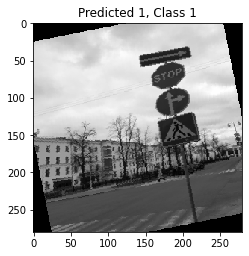

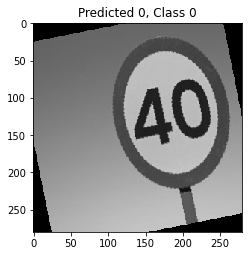

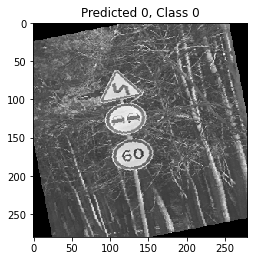

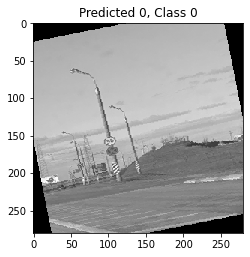

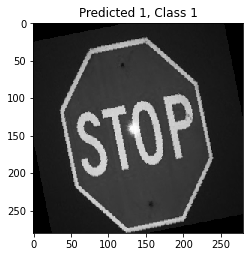

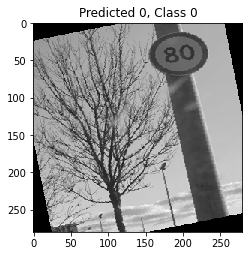

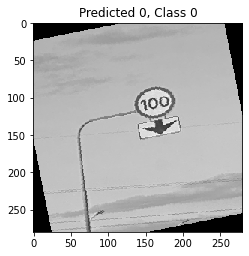

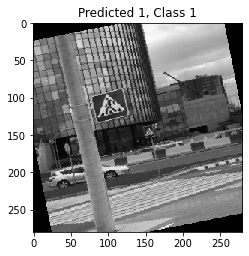

In [14]:
display.predict_labels(model, test_ds)

### Add Augmentation and Dropout

In [25]:
train_ds, test_ds = ic.prepare_dataset()
train_ds, test_ds = ic.optimize_datasets(train_ds, test_ds)

In [26]:
model = ic.create_model()

In [27]:
history = ic.model_compile(model, train_ds, test_ds,20)
history

Epoch 1/20
22/22 [==============================] - 24s 1s/step - loss: 0.7198 - accuracy: 0.7216 - val_loss: 0.4720 - val_accuracy: 0.8150
Epoch 2/20
22/22 [==============================] - 22s 993ms/step - loss: 0.4725 - accuracy: 0.8068 - val_loss: 0.5950 - val_accuracy: 0.7283
Epoch 3/20
22/22 [==============================] - 22s 994ms/step - loss: 0.4200 - accuracy: 0.8352 - val_loss: 0.3665 - val_accuracy: 0.8613
Epoch 4/20
22/22 [==============================] - 22s 987ms/step - loss: 0.4655 - accuracy: 0.8168 - val_loss: 0.3839 - val_accuracy: 0.8671
Epoch 5/20
22/22 [==============================] - 22s 984ms/step - loss: 0.4290 - accuracy: 0.8310 - val_loss: 0.3407 - val_accuracy: 0.8671
Epoch 6/20
22/22 [==============================] - 23s 1s/step - loss: 0.3976 - accuracy: 0.8395 - val_loss: 0.3846 - val_accuracy: 0.8728
Epoch 7/20
22/22 [==============================] - 22s 989ms/step - loss: 0.3906 - accuracy: 0.8551 - val_loss: 0.4389 - val_accuracy: 0.8092
Epoch

In [28]:
display.model_loss_acc(model, test_ds)

6/6 - 2s - loss: 0.3454 - accuracy: 0.8555


(0.3454270660877228, 0.8554913401603699)

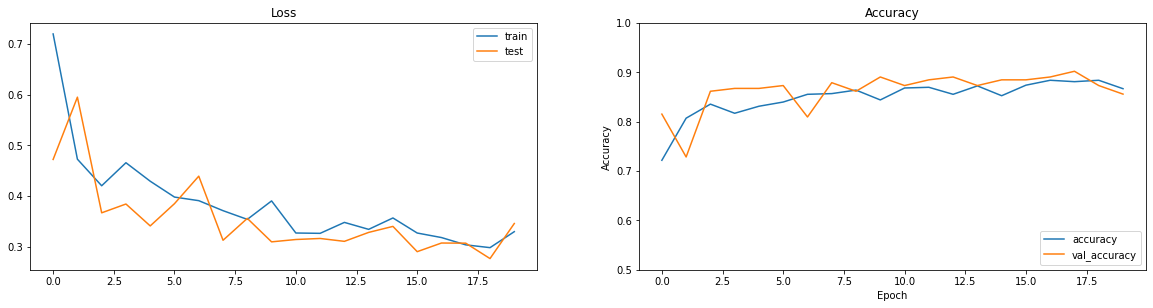

In [29]:
display.model_results(history)

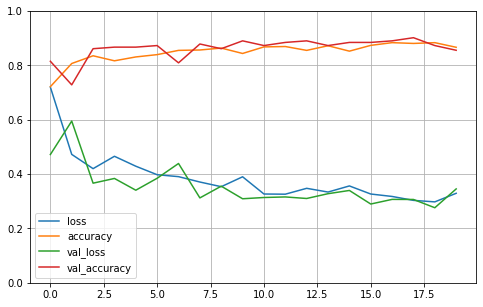

In [30]:
display.model_results_2(history)

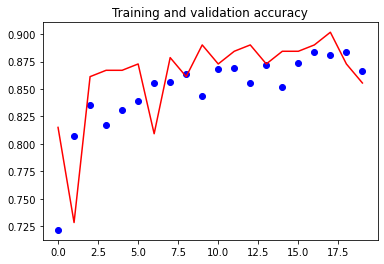

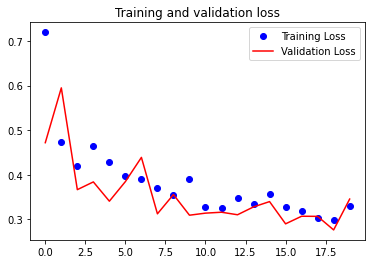

In [31]:
display.model_results_3(history)

Found 26 correct labels
Found 6 incorrect labels


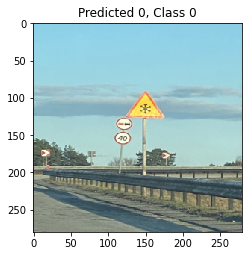

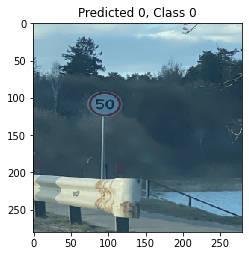

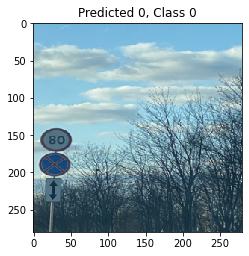

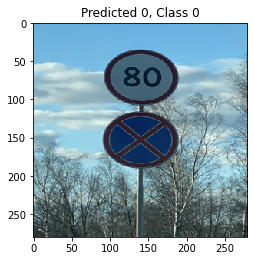

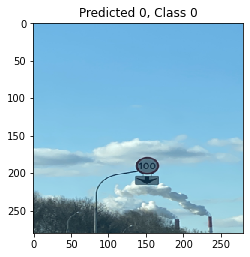

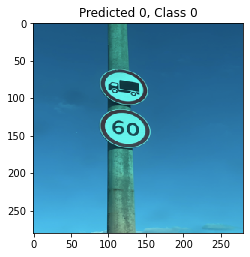

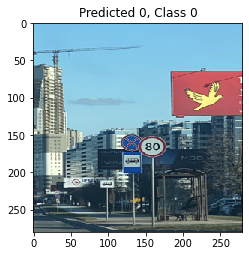

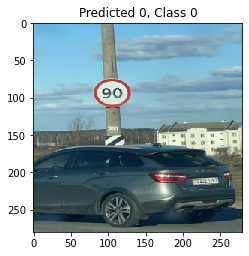

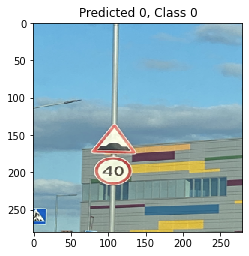

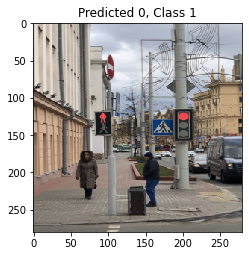

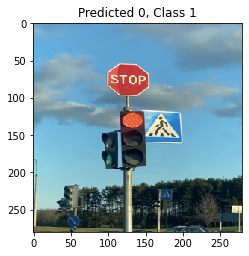

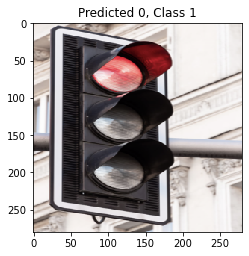

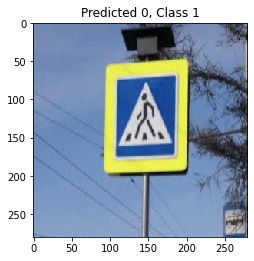

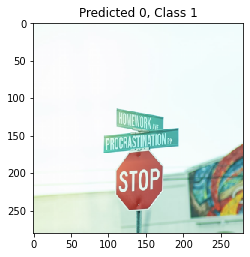

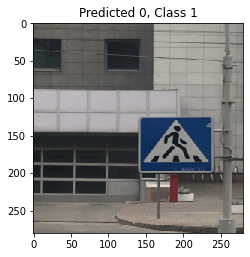

In [32]:
display.predict_labels(model, test_ds)